In [124]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
X_train=pd.read_csv("train-new-2.csv", sep=';')
y_train=pd.read_csv("train-target-new-3.csv")
X_test=pd.read_csv("test-new-2.csv", sep=';')
d = dict.fromkeys(X_train.columns)
for j,i in enumerate(d.keys()):
    d[i]=j
X_train=X_train.rename(columns=d)
h = dict.fromkeys(X_test.columns)
for j,i in enumerate(h.keys()):
    h[i]=j
X_test=X_test.rename(columns=h)

In [6]:
from sklearn.model_selection import train_test_split
train_data, test_data, label_train, label_test= train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

In [142]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train_data, label_train)
scaled_train_data=scaler.transform(train_data)
scaled_test_data=scaler.transform(test_data)
scaled_test=scaler.transform(X_test)
scale=pd.DataFrame(scaled_test)

In [11]:
pd.DataFrame(scaled_train_data)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.767216,-0.206356,0.874750,-0.438133,0.449534,1.427478,0.961197,-0.686333,0.079580,-0.978135,...,0.829033,0.227819,-0.691022,-0.580779,0.875967,-0.642296,-0.143430,1.133472,-1.210072,-0.870235
1,-1.538653,-0.432282,0.322970,1.191764,1.933627,0.857765,0.737437,2.095095,-0.854576,1.008683,...,1.930591,0.568862,2.111062,1.045767,0.650686,1.387972,0.772337,-0.110256,0.187587,0.042075
2,-0.695357,1.072710,1.391810,0.078985,-1.019793,0.764423,-2.059881,0.699557,-0.416155,-0.979181,...,-0.328754,-0.038120,0.684280,1.479997,-0.475211,0.189400,0.231710,1.009037,-0.304351,0.438214
3,0.892126,0.688272,-0.746899,-0.057050,-0.338574,-0.825324,-0.214123,0.002797,-0.201151,0.950548,...,1.139175,-0.882968,0.017445,0.929640,0.347071,-1.178756,0.682797,-0.293038,1.802035,0.202199
4,-0.605611,0.817692,0.796588,-0.286876,-1.404718,1.537497,0.999669,-0.537001,0.179878,-0.955037,...,0.402715,0.590283,-0.550611,0.498241,-0.693697,-0.566998,-0.181224,-0.285861,-0.112188,-0.205759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.178966,0.865812,-0.672513,-0.959964,0.056583,-0.614511,0.956442,-0.729052,0.620708,-1.055875,...,-0.068168,-0.475344,-0.743762,1.036214,-0.250039,0.564618,-0.017201,-1.302622,-0.449931,0.468440
6996,0.345323,0.667615,0.163296,1.510048,-1.192459,-0.349811,-0.213581,0.229477,1.196926,-1.061299,...,1.088507,0.044154,0.223242,1.040130,-0.980800,2.033477,-0.153719,-1.697338,0.076403,-0.576770
6997,0.734355,-1.244074,2.216405,-0.860962,-0.352479,1.584964,-0.596399,-0.630021,-0.083297,0.930495,...,-0.185601,-0.968642,-0.623929,-0.208524,1.033669,-1.834881,0.155783,-0.809736,1.028721,-0.977967
6998,-0.674882,0.644348,-0.408919,-0.872504,0.580688,0.039089,0.237126,-0.169146,0.308503,1.023409,...,0.261535,1.680066,-0.161999,-0.096460,0.455709,0.406115,-0.461488,-0.365808,-0.269959,0.468600


In [102]:
LR=LogisticRegression(random_state=42,penalty='l1', solver='saga')
params={
    'C':[0.001, 0.01, 0.1, 0.5, 1, 5, 10]
}
LRcv=GridSearchCV(LR, params, cv=3, scoring='neg_log_loss')
LRcv.fit(scaled_train_data,  label_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l1',
                                          random_state=42, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_log_loss', verbose=0)

In [184]:
LRcv.best_params_
LRcv_best.coef_
arr_coef=[]
for i in LRcv_best.coef_:
    for j in i:
        arr_coef.append(j)
dictk={}
for i in range(len(pd.DataFrame(scaled_train_data).columns)):
    dictk[i]=arr_coef[i]
trash_real=[]    
for i in dictk.keys():
    if abs(dictk[i]) < 1e-3:
        trash_real.append(i)
trash_real

[0,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 13,
 17,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [179]:
scaled_train_data=pd.DataFrame(scaled_train_data)
scaled_test_data=pd.DataFrame(scaled_test_data)

In [185]:
scaled_train_data, scaled_test_data = scaled_train_data.drop(trash_real, axis=1), scaled_test_data.drop(trash_real, axis=1)

In [120]:
LR2=LogisticRegression(random_state=42)
LR2.fit(scaled_train_data, label_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
from sklearn.metrics import roc_curve

In [122]:
proba=LR2.predict_proba(scaled_test_data)[:,1]

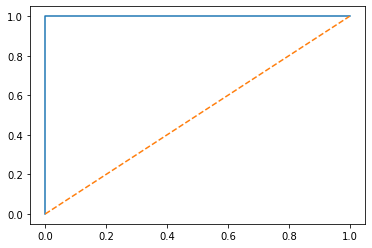

In [125]:
fpr, tpr, _ = roc_curve(label_test, proba)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--')

In [144]:
trash_real

[0, 1, 3, 4, 5, 6, 7]

In [126]:
label_test

,0
6946,1
7260,0
527,1
9981,0
1240,1
...,...
9614,1
3006,1
2349,1
4005,1


In [127]:
label_train

,0
3096,0
6864,1
5991,0
6206,1
3946,0
...,...
4384,0
9785,0
732,1
2573,1


In [152]:
score=pd.DataFrame(LR2.predict_proba(scale)[:,1])
score.to_csv(r'score_LR3.csv', index=False, header=0)

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
RFC=RandomForestClassifier(random_state=42)

In [159]:
parametrs={
    'n_estimators': [500, 1000, 100],
    'max_depth': [10, 40, 10],
    'criterion': ['gini']
}

In [188]:
RFCV=GridSearchCV(RFC, parametrs, cv=3)
RFCV.fit(scaled_train_data, label_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [189]:
RFCV.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 500}

In [190]:
RFCV_best=RFCV.best_estimator_
from sklearn.metrics import f1_score

In [186]:
pd.DataFrame(scaled_test_data)

,2,9,12,14,15,16,21,29
0,-1.509051,0.957800,0.714652,-1.952373,2.868837,-0.497630,0.343084,0.974576
1,0.388540,-1.061488,-0.018204,-0.058916,-0.612506,0.167898,-0.948777,-0.648659
2,-0.370396,0.982821,-0.355543,-1.206147,0.335758,0.752942,0.071446,-0.330630
3,0.005659,-1.010142,0.291568,0.021158,-0.230723,-1.336946,-2.271000,-0.791436
4,-1.530805,1.046618,1.378716,-0.841623,1.178455,0.870802,-0.100203,0.390259
...,...,...,...,...,...,...,...,...
2995,-0.695489,1.017802,0.611499,0.366889,-0.355130,1.232591,1.396331,1.799151
2996,1.190184,1.012357,0.192686,-0.377825,0.527061,0.201073,0.813140,0.958953
2997,-0.034494,0.965788,0.684780,0.917071,1.052647,0.798444,-0.262652,0.606416
2998,-0.807322,1.002494,-0.194043,-0.476767,0.456102,0.668063,-2.215832,1.204952


In [191]:
roc_auc_score(label_test, RFCV_best.predict_proba(scaled_test_data)[:,1])

1.0

In [192]:
score=pd.DataFrame(RFCV_best.predict_proba(scale)[:,1])
score.to_csv(r'score_RFCV2.csv', index=False, header=0)